# Recommendation System - Amazon Book Review Analysis

# Business Understanding
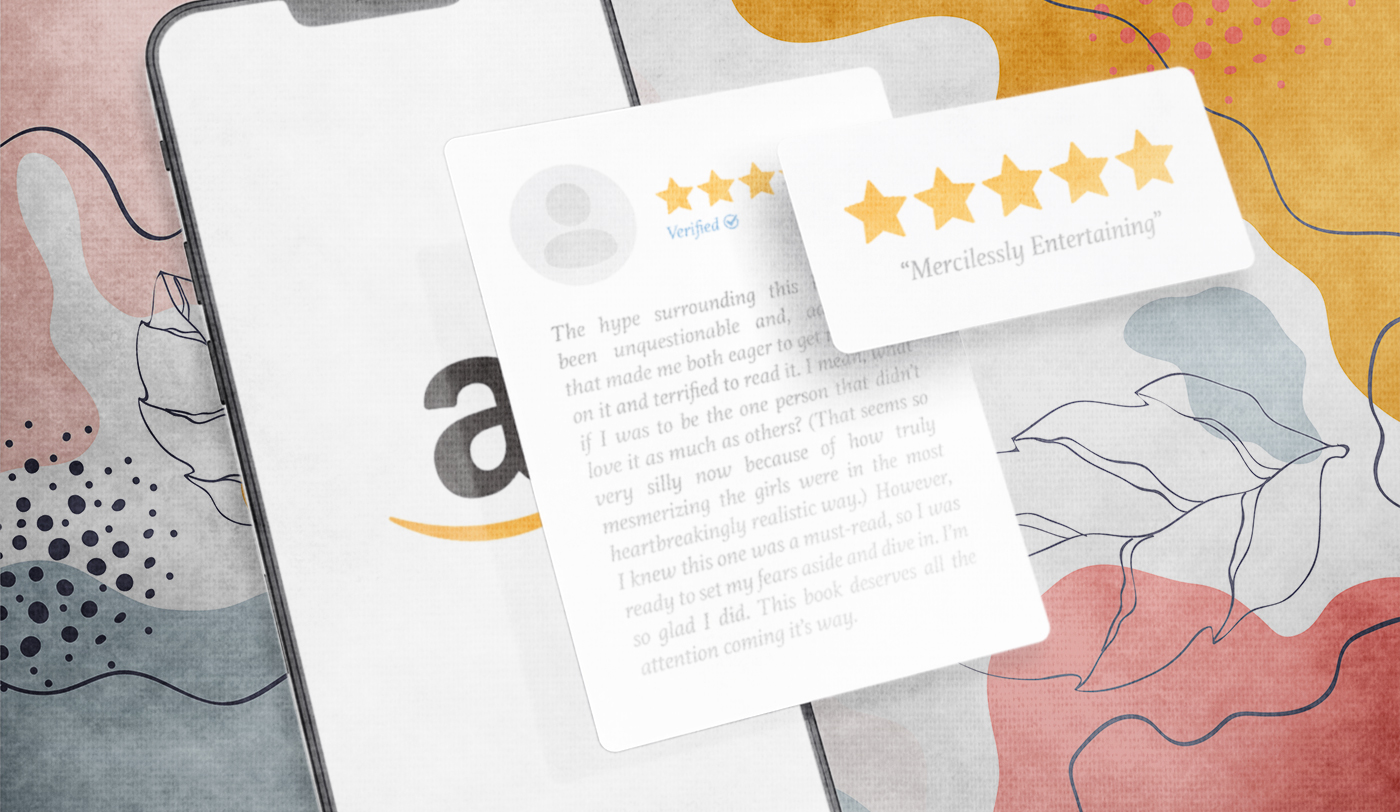
* The days of customers walking into a shop to buy what they need/want are long
behind us and worse still if these are items are not basic needs.
More and more clients prefer to make purchases from the comfort of their home.
* The goods that a retailer is able to market online is limitless however customers easily get tired of scrolling though an endless catalogue of items for sale.
* Therefore rises the need for a recommendation system that will enable a client have a seamless buying experience.
The reading culture is changing hence our choice of the amazon books dataset.
* A recommendation system will enable buyers get the most ideal and trending books to buy.
* The target audience would be both the retailers and the purchasers.





# Data Understanding & Source
* The data has been obtained from https://amazon-reviews-2023.github.io/ and in jsonl format. An efficient format for storing data that is unstructured or produced over time.
* It contains a list of books sold in Amazon. The original dataset contains 4 million rows, from 1996 to 2023. We will trim it to the most recent 500k to make it easier to work with.
* The data contains following features/columns in the dataset.

| Column Name | Description |
|---|---|
| rating | Rating of the product (from 1.0 to 5.0). |
| title_x | Title of the user review. |
| text | Text body of the user review. |
| images | Links to images (comma-separated if multiple). |
| asin(product key) | Unique identifier for the product. |
| parent_asin | Identifier for the parent product (applicable for variations). |
| user_id | Unique identifier for the reviewer. |
| timestamp | Date and time of the review. |
| helpful_vote | Number of helpful votes received by the review. |
| verified_purchase | Indicates whether the reviewer purchased the product (True/False). |
| main_Category | Main category (domain) to which the product belongs (e.g., Electronics, Clothing). |
| title_y | Name of the product as mentioned in the review. |
| price | Price of the product in US dollars. |



## Data Importation

In [ ]:
# Mount the google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import the necesarry libraries

import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the merged dataset
# file_path = '/content/drive/My Drive/Capstone_Group_14_Project/merged_Books.jsonl'
file_path = '/content/drive/MyDrive/merged_Books.jsonl'
# Initialize an empty list to store the parsed JSON objects
data = []

# Read each line of the JSON Lines file and parse it
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))

# Convert the list of JSON objects into a DataFrame
df = pd.DataFrame(data)
df.head()

,rating,title_x,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,main_category,title_y,price
0,5,Wonderful and Inspiring,This book is wonderful and inspiring for kids ...,[],B0C6Z8N9N8,B0C6Z8N9N8,AG2FEEHWHCQELOHBIDQDROZ3LSNA,1694657549017,0,False,Books,Of Life: The Rollercoaster,from 11.99
1,5,Awesome book,This is a wonderful children’s book! My daught...,[],B0C6Z8N9N8,B0C6Z8N9N8,AERUMG7KTKZAIOQ3PO5LJUF33UKQ,1693063638325,0,False,Books,Of Life: The Rollercoaster,from 11.99
2,5,Amazing,Product arrived quickly in great condition. Be...,[],1401241883,1401241883,AEK3AFSE3D2BSOC6XI65XNO23MKQ,1694654386695,0,True,Books,The Sandman Omnibus Vol. 1,80.23
3,5,Got this at a great price.,I payed $89.00 dollars. When it first came out...,[],1401241883,1401241883,AFPYBFVIJI3GFPPFANRYIBJZKPLA,1683048302761,0,True,Books,The Sandman Omnibus Vol. 1,80.23
4,5,The Best of the Best,Neil Gaimans stories are spellbinding. Moreove...,[],1401241883,1401241883,AECBBBUARXJEZYZS2PXN2K66A4DA,1679249708115,0,False,Books,The Sandman Omnibus Vol. 1,80.23


### Data Understanding

In [ ]:
# Preview the attributes of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   rating             300000 non-null  int64 
 1   title_x            300000 non-null  object
 2   text               300000 non-null  object
 3   images             300000 non-null  object
 4   asin               300000 non-null  object
 5   parent_asin        300000 non-null  object
 6   user_id            300000 non-null  object
 7   timestamp          300000 non-null  int64 
 8   helpful_vote       300000 non-null  int64 
 9   verified_purchase  300000 non-null  bool  
 10  main_category      299989 non-null  object
 11  title_y            300000 non-null  object
 12  price              267594 non-null  object
dtypes: bool(1), int64(3), object(9)
memory usage: 27.8+ MB


In [ ]:
# Review the rows and columns of the data
df.shape

(300000, 13)

In [ ]:
# Min and max rating
print('Max rating:', df['rating'].max())
print('Min rating:',df['rating'].min())

Max rating: 5
Min rating: 1


- Some book titles appear multiple times. We can get the value counts for the most frequent.

In [ ]:
# Most frequent boooks
df['title_y'].value_counts()

title_y
The Sacrifice: A Dark Revenge Romance                                                            476
Spare                                                                                            463
The Maid's Diary: A Novel                                                                        354
The Serpent and the Wings of Night (Crowns of Nyaxia Book 1)                                     296
Stone Maidens                                                                                    260
                                                                                                ... 
The Long Goodbye: A Philip Marlowe Novel, Book 6                                                   1
Corpse in the Mead Hall: A Viking Witch Cozy Mystery (The Viking Witch Cozy Mysteries Book 6)      1
Metro Wine Map of France                                                                           1
Souffle Cookbook: Souffle Recipes from Around the World: Souffle Cookbook For You  

- Getting the value counts for users that give multiple review ('user_id')

In [ ]:
# Top 5 users based on the number of ratings
top_five_users = df.groupby('user_id').size().sort_values(ascending=False)[:5]
top_five_users

user_id
AHK67LFXJBYE5APXUTYTJTDSHL4A      264
AGWMG5ARMSS5U2FMSSMPNML6MTNQ_1    121
AGVBYI2T5QRJVZ6KX2YH7LHF7YRQ       90
AFMBF3NCA6H2AHO6D2WX6SUBPELA       86
AENPLYFNCNXWGB3XF2HPD5EKJD6Q       80
dtype: int64

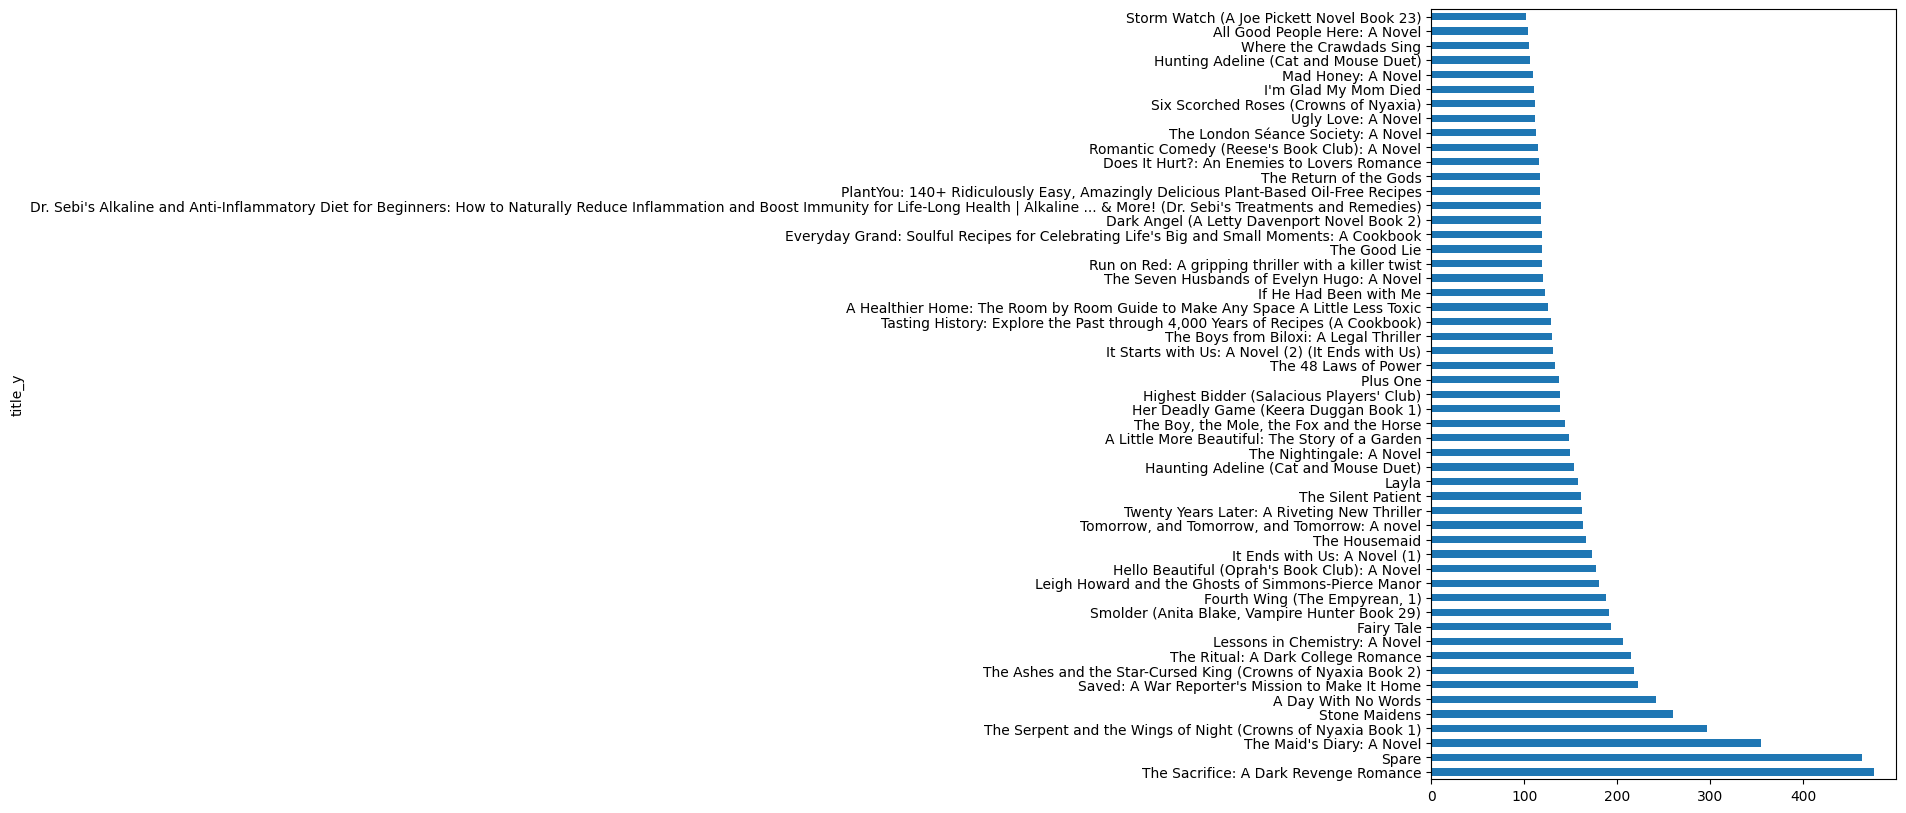

In [ ]:
# Visual for book title appearing more than 200 times
filtered_counts = df['title_y'].value_counts()[lambda x: x >= 100]
# Increase plot width using figsize
plt.figure(figsize=(6, 10))

# Plot the distribution
filtered_counts.plot(kind='barh')
plt.show()

In [ ]:
# Books only appearing once and more than 50 times in the data
single_mention = df['title_y'].value_counts()[lambda x: x == 1]
above_fifty_mention = df['title_y'].value_counts()[lambda x: x >= 50]
print(len(above_fifty_mention))
print(len(single_mention))

180
114626


- Visualizing distribution of ratings.

        title_y
rating         
1         18798
2          9954
3         14855
4         32038
5        224355


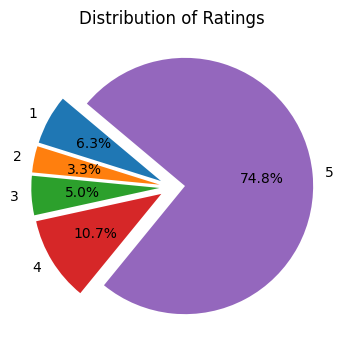

In [ ]:
# Group sales data rating by count of title

rating_df = df[['rating', 'title_y']].copy().groupby('rating').count()
print(rating_df)

# Explode settings
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # Explode all the slices

# Plot
plt.figure(figsize=(4, 4))
plt.pie(rating_df['title_y'], labels=rating_df.index, autopct='%1.1f%%', startangle=140, explode = explode)
plt.axis('equal')
plt.title('Distribution of Ratings')
plt.show()

- Books with a rating of 5 take up 74.8% of the data. This necessitates for more features to be used in recommendation, that is title for rating and rating text.

In [ ]:
# Books rating count
rating_count = df['rating'].value_counts()
rating_count

rating
5    224355
4     32038
1     18798
3     14855
2      9954
Name: count, dtype: int64

- Visualizing ratings from verified purchases and the other for non-verified purchases

In [ ]:
# Get user count information
user_count = df['user_id'].value_counts()
single_user_mention = df['user_id'].value_counts()[lambda x: x == 1]
print('Number of users appearing once:',len(single_user_mention) )
print('Number of unique users:',len(user_count))

Number of users appearing once: 178013
Number of unique users: 215350


##### Exploring the 'main_category' field

In [ ]:
# Identify the unique values in the

print(df['main_category'].unique())

['Books' 'Buy a Kindle' 'Musical Instruments' 'Audible Audiobooks' ''
 'Toys & Games' 'Office Products' 'AMAZON FASHION' 'Amazon Home' None
 'Tools & Home Improvement' 'Arts, Crafts & Sewing'
 'Industrial & Scientific']


In [ ]:
# Identify the unique values in the 'main_category'
print(df['main_category'].value_counts())

main_category
Books                       247285
Buy a Kindle                 44247
Audible Audiobooks            8214
                               182
Toys & Games                    29
Amazon Home                     14
Office Products                  7
Musical Instruments              6
Arts, Crafts & Sewing            2
AMAZON FASHION                   1
Tools & Home Improvement         1
Industrial & Scientific          1
Name: count, dtype: int64


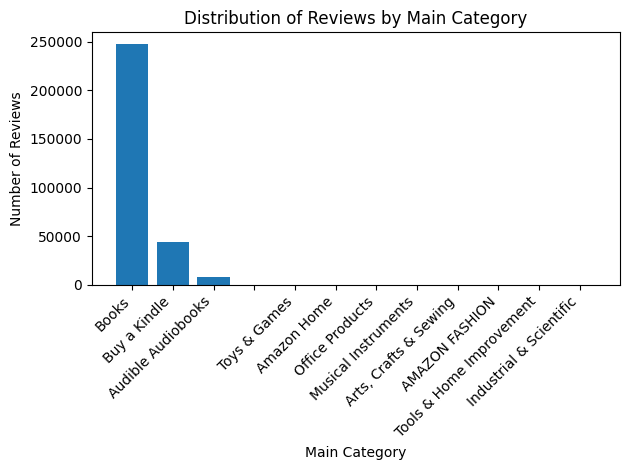

In [ ]:
# Count the occurrences of each category
category_counts = df['main_category'].value_counts()

# Create a bar chart
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Main Category')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Main Category')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

- From the plot above we see that most of the books are classified in the **Books**, **Buy a Kindle** and **Audiobooks** category. Other categories do not have more than 30 books, and 182 of them not categorized.
- Category column does not give the book genres accurately and therefor will be dropped

# Data Cleaning

- First we drop the columns not needed
  - images
  - asin
  - parent_asin
  - timestamp
  - verified_purchase

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   rating             300000 non-null  int64 
 1   title_x            300000 non-null  object
 2   text               300000 non-null  object
 3   images             300000 non-null  object
 4   asin               300000 non-null  object
 5   parent_asin        300000 non-null  object
 6   user_id            300000 non-null  object
 7   timestamp          300000 non-null  int64 
 8   helpful_vote       300000 non-null  int64 
 9   verified_purchase  300000 non-null  bool  
 10  main_category      299989 non-null  object
 11  title_y            300000 non-null  object
 12  price              267594 non-null  object
dtypes: bool(1), int64(3), object(9)
memory usage: 27.8+ MB


In [ ]:
# Drop the columns
columns_to_drop = ['images','asin', 'parent_asin', 'timestamp', 'verified_purchase']
df1 = df.drop(columns_to_drop, axis=1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating         300000 non-null  int64 
 1   title_x        300000 non-null  object
 2   text           300000 non-null  object
 3   user_id        300000 non-null  object
 4   helpful_vote   300000 non-null  int64 
 5   main_category  299989 non-null  object
 6   title_y        300000 non-null  object
 7   price          267594 non-null  object
dtypes: int64(2), object(6)
memory usage: 18.3+ MB


In [ ]:
# Remove the words 'from' and 'None' from the price column
df1['price'] = df1['price'].astype(str).str.replace(r'(from|None)\s*','', regex=True)

# Remove special characters from the price column
df1['price'] = df1['price'].replace(['','—'],np.nan)

# Convert the price column to data type float
df1['price'] = df1['price'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   rating         300000 non-null  int64  
 1   title_x        300000 non-null  object 
 2   text           300000 non-null  object 
 3   user_id        300000 non-null  object 
 4   helpful_vote   300000 non-null  int64  
 5   main_category  299989 non-null  object 
 6   title_y        300000 non-null  object 
 7   price          265147 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 18.3+ MB


In [ ]:
# Sum up the null values in the price column

df1['price'].isnull().sum()

34853

In [ ]:
# Fill null values in 'price' column with the mean

df1['price'] = df1['price'].fillna(df1['price'].mean())
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   rating         300000 non-null  int64  
 1   title_x        300000 non-null  object 
 2   text           300000 non-null  object 
 3   user_id        300000 non-null  object 
 4   helpful_vote   300000 non-null  int64  
 5   main_category  299989 non-null  object 
 6   title_y        300000 non-null  object 
 7   price          300000 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 18.3+ MB


- With no missing values, we move to renaming the columns to more meaningful titles

In [ ]:
# Rename the title_x and title_y column to title_rating and title_book respectively

df1 = df1.rename(columns={'title_x': 'title_rating', 'title_y': 'title_book'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   rating         300000 non-null  int64  
 1   title_rating   300000 non-null  object 
 2   text           300000 non-null  object 
 3   user_id        300000 non-null  object 
 4   helpful_vote   300000 non-null  int64  
 5   main_category  299989 non-null  object 
 6   title_book     300000 non-null  object 
 7   price          300000 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 18.3+ MB


In [ ]:
# Preview the data with new columns
df1.head(3)

,rating,title_rating,text,user_id,helpful_vote,main_category,title_book,price
0,5,Wonderful and Inspiring,This book is wonderful and inspiring for kids ...,AG2FEEHWHCQELOHBIDQDROZ3LSNA,0,Books,Of Life: The Rollercoaster,11.99
1,5,Awesome book,This is a wonderful children’s book! My daught...,AERUMG7KTKZAIOQ3PO5LJUF33UKQ,0,Books,Of Life: The Rollercoaster,11.99
2,5,Amazing,Product arrived quickly in great condition. Be...,AEK3AFSE3D2BSOC6XI65XNO23MKQ,0,Books,The Sandman Omnibus Vol. 1,80.23


In [ ]:
# Convert text and title_rating column to lower case and remove punctuation marks
import string

def clean_text(text):
  if isinstance(text, str):
    text = text.lower()
    # Remove punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
  else:
    return str(text)

df1['text'] = df1['text'].apply(lambda x: clean_text(x))
df1['title_rating'] = df1['title_rating'].apply(lambda x: clean_text(x))

In [ ]:
# Tokenize and remove stop words from the text and title_rating columns
import nltk
from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    """
  This function removes stop words from a given text string.

  Args:
      text (str): The string to remove stop words from.

  Returns:
      list: A list of words after removing stop words from the original text.
  """
    # Tokenize input text
    tokens = word_tokenize(text)
    # filter out stop wiords and return list of words without stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens
# Apply the remove_stopwords function to the 'text' and 'title_rating'
df1['tokenized_text'] = df1['text'].apply(lambda x: remove_stopwords(x))
df1['tokenized_title_rating'] = df1['title_rating'].apply(lambda x: remove_stopwords(x))
df1.sample(3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,rating,title_rating,text,user_id,helpful_vote,main_category,title_book,price,tokenized_text,tokenized_title_rating
17571,5,giving annabelle a run for her money…,delightful and terrifying 5 stars,AG5TQUIZOAMXS2CCZPTXHXW35VNQ,0,Buy a Kindle,How to Sell a Haunted House,14.99,"[delightful, terrifying, 5, stars]","[giving, annabelle, run, money…]"
276299,3,lovely book but with errors,first of all the story tells us that stevie wa...,AF7KI4OIF36DY7EQ72JO6K6BY5MQ,0,Books,Female Force: Stevie Nicks,4.26,"[first, story, tells, us, stevie, born, 1958, ...","[lovely, book, errors]"
93833,5,amazing book,great read for my kids… love the message thank...,AF4ZOLYKJQ7IE2YWVXBYG7KSLXNQ,1,Books,A Day With No Words,14.99,"[great, read, kids…, love, message, thank, wri...","[amazing, book]"


In [ ]:
# Display a frequency distribution of the most common words

from nltk.probability import FreqDist
from itertools import chain

def common_words(df, column, n=15):
  all_tokens = list(chain.from_iterable(df1['tokenized_title_rating']))
  fdist = FreqDist(all_tokens)
  return fdist.most_common(n)

common_words(df1, 'tokenized_title_rating', 15)

[('book', 51383),
 ('great', 37020),
 ('read', 23177),
 ('good', 17009),
 ('love', 12440),
 ('story', 11124),
 ('fun', 7544),
 ('’', 7277),
 ('excellent', 6652),
 ('amazing', 6502),
 ('beautiful', 5817),
 ('best', 4913),
 ('series', 4907),
 ('cute', 4660),
 ('loved', 4636)]

In [ ]:
# Add 'book' and ' to the stop words list and remove them from the tokenized_title_rating in the dataset

additional_stop_words = {'book', '’','story'}

stop_words.update(additional_stop_words)

df1['tokenized_title_rating'] = df1['title_rating'].apply(lambda x: remove_stopwords(x))

print(common_words(df1, 'tokenized_title_rating', 10))


[('great', 37020), ('read', 23177), ('good', 17009), ('love', 12440), ('fun', 7544), ('excellent', 6652), ('amazing', 6502), ('beautiful', 5817), ('best', 4913), ('series', 4907)]


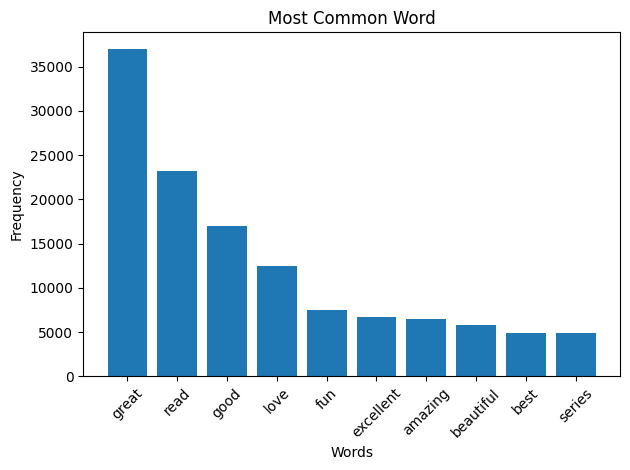

In [ ]:
# Get the 10 most common words (excluding additional stop words)
most_common_words = common_words(df1, 'tokenized_title_rating', 10)

# Unpack tuples into separate lists for words and counts
words, counts = zip(*most_common_words)

# Create a bar chart to visualize the most common words
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Word')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Modelling

In [ ]:
df1.sample(2)

,rating,title_rating,text,user_id,helpful_vote,main_category,title_book,price,tokenized_text,tokenized_title_rating
258387,5,great book,these books hooked me and i can’t wait for rel...,AHVPHFKVSUZGE3MK6SUHDXFMG4QA,0,Buy a Kindle,Return to Paradiso: Absolutely gripping and em...,0.00,"[books, hooked, ’, wait, release, third, book,...",[great]
277178,5,ode to a wyoming ranch,boulder architect turned wyoming rancher bob w...,AHH2D2IQOWANSYYVJJNPSWQSP55Q,0,Books,Twenty Miles of Fence: Blueprint of a Cowboy,17.36,"[boulder, architect, turned, wyoming, rancher,...","[ode, wyoming, ranch]"


Sentiment Analysis:

The goal is to understand the sentiment expressed in the review text (positive or negative).
The sentiment analysis here includes traditional machine learning algorithms involving Multinomial Naive Bayes analysis, Support Vector Machines (SVM) and Random Forest. We used the  precision, recall, f1-score & support to compare

### Multinomial Naive Bayes classifier

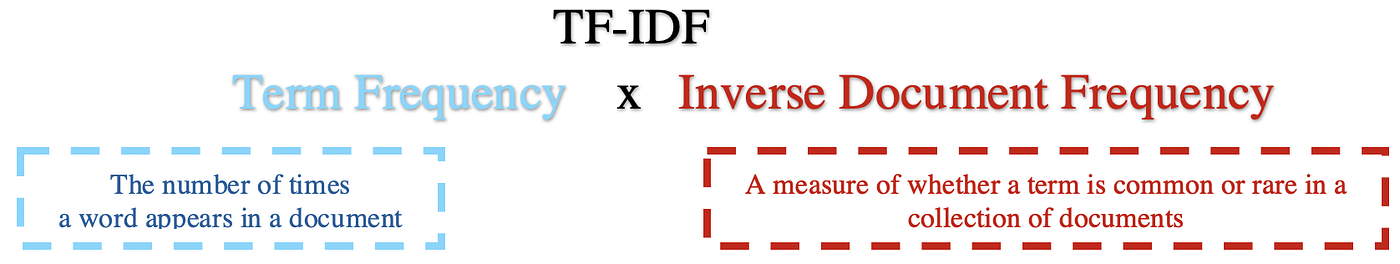

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Select the features
X = df1['tokenized_title_rating']
y = (df1['rating'] > 3).astype(int)  # Convert ratings to binary labels (1 for positive, 0 for negative)

# Convert each review text list to a single string
X_str = [' '.join(tokens) for tokens in X]

# Split data into train and test sets(20%)
X_train, X_test, y_train, y_test = train_test_split(X_str, y, test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.44      0.58      8810
           1       0.91      0.98      0.95     51190

    accuracy                           0.91     60000
   macro avg       0.87      0.71      0.76     60000
weighted avg       0.90      0.91      0.89     60000



- Overall the model performed well with an accuracy of 91%. However it is important to not that it identified 51190 positive reviews and 8810 negative reviews. This led to selecting a different model; Support Vector Machines that can handle imbalanced data better.

### SVM

In [ ]:
from sklearn.svm import SVC

# Select the features
X = df1['tokenized_title_rating']
y = (df1['rating'] > 3).astype(int)

# Convert each review text list to a single string
X_str = [' '.join(tokens) for tokens in X]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_str, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.46      0.59      8810
           1       0.91      0.98      0.95     51190

    accuracy                           0.90     60000
   macro avg       0.86      0.72      0.77     60000
weighted avg       0.90      0.90      0.89     60000



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Combine tokens into strings for each review
X_str = [' '.join(tokens) for tokens in X]

# Split data into train and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X_str, y, test_size=0.2, random_state=42)

# Create TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)  # Adjust n_estimators as needed
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.77      0.54      0.63      8810
           1       0.92      0.97      0.95     51190

    accuracy                           0.91     60000
   macro avg       0.85      0.75      0.79     60000
weighted avg       0.90      0.91      0.90     60000



- All three classification models (Multinomial Naive Bayes, SVM, and Random Forest) achieved high accuracy (around 90%) in sentiment analysis.
- Multinomial Naive Baye has a slight edge in identifying positive reviews with a recall of 0.98, but it struggles more with negative reviews  with a recall of 0.44. SVM and Random Forest show similar performance generally. They perform well in identifying positive reviews and slightly better than Naive Bayes on negative reviews; recall around 0.54-0.46.
- Naive Bayes might be slightly better at capturing positive sentiment, while SVM and Random Forest offer a more balanced performance between positive and negative reviews.

## Recommendation System
- **Build the content-based recommendation system.**
  - We create a TF-IDF matrix from the lemmatized text.
  - Compute cosine similarity between items based on their TF-IDF vectors.
  - Define a function to get recommendations for a given book title.

This approach recommends books based on the lemmatized_title_rating text
  - Calculate TF-IDF vectors for "lemmatized_title_rating". Recommend books with the highest cosine similarity to a user's preferred book.
  - Keyword matching: Extract keywords from "lemmatized_title_rating". Recommend books with similar keywords to a user's preferred book.


In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(w) for w in tokens]

# Apply lemmatization to the 'tokenized_text' column
df1['lemmatized_text'] = df1['tokenized_title_rating'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Lemmatize tokenized_title_rating column
df1['lemmatized_title_rating'] = df1['tokenized_title_rating'].apply(lemmatize_text)
df1.sample(2)

,rating,title_rating,text,user_id,helpful_vote,main_category,title_book,price,tokenized_text,tokenized_title_rating,lemmatized_text,lemmatized_title_rating
20354,5,its a must read for the tarot start up,very informative and must read as your guidanc...,AGJQFZRIUZXXVZYYXXPDPIUW4ZJA,0,Books,Guided Tarot: A Beginner's Guide to Card Meani...,14.39,"[informative, must, read, guidance, explain, p...","[must, read, tarot, start]","[must, read, tarot, start]","[must, read, tarot, start]"
136208,5,great translation,this translation is very accessible to the mod...,AH5WL2MAAPXZWUGD535HUS7VF7HQ,0,Books,Les Miserables: (Penguin Classics Deluxe Edition),24.49,"[translation, accessible, modern, reader, star...","[great, translation]","[great, translation]","[great, translation]"


In [ ]:
# Convert each list of tokens back into a string
df1['lemmatized_title_rating'] = df1['lemmatized_title_rating'].apply(lambda tokens: ' '.join(tokens))

# Create a Tfidf Vectorizer object
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['lemmatized_title_rating'])
tfidf_matrix.shape

(300000, 5000)

In [ ]:
df1_content = df1[['title_book','lemmatized_title_rating']]
df1_content.head()

,title_book,lemmatized_title_rating
0,Of Life: The Rollercoaster,wonderful inspiring
1,Of Life: The Rollercoaster,awesome
2,The Sandman Omnibus Vol. 1,amazing
3,The Sandman Omnibus Vol. 1,got great price
4,The Sandman Omnibus Vol. 1,best best


#### Cosine similarity
- Recommendation of books based on **cosine similarity** between a given book title and other books in a TF-IDF matrix. It retrieves the 5-top most similar books and returns their titles.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_books(book_title, tfidf_matrix, df1_content, n_recs=5):

    # Check if the book title exists in the DataFrame
    if book_title not in df1_content['title_book'].values:
        print(f"Book title '{book_title}' not found :()")
        return []

    # Get the index of the query book
    book_idx = df1_content.index[df1_content['title_book'] == book_title].tolist()
    if not book_idx:
        print(f"No index found for book title '{book_title}'.")
        return []
    book_idx = book_idx[0]

    # Calculate cosine similarity between the query book and all books
    cosine_similarities = cosine_similarity(tfidf_matrix[book_idx], tfidf_matrix).flatten()

    # Get indices of top n most similar books, excluding the query book itself
    similar_indices = cosine_similarities.argsort()[:-n_recs-2:-1]
    similar_indices = similar_indices[similar_indices != book_idx]

    # Extract recommended book titles from DataFrame
    recommended_books = df1_content.iloc[similar_indices]['title_book'].values.tolist()

    # Return top 5 books from the list
    return recommended_books[:n_recs]


In [ ]:
# Test 1 for the recommendation
recommended_books = recommend_books(book_title='The Echo of Old Books: A Novel',
                                    tfidf_matrix=tfidf_matrix, df1_content=df1_content)

# Print the recommended books
print(f"Recommended books: {recommended_books}")

Recommended books: ["Pete! Get in Bed! : Phonics Readers VERY Short Children's Beginner Readers Books", 'On the Job: First Responders: Expressions, Equations, and Inequalities (Mathematics in the Real World)', 'Comparative Health Information Management', 'Under the Black Umbrella: Voices from Colonial Korea, 1910–1945', 'Canter with a Killer (Horse Rescue Mystery, A)']


In [ ]:
# Test 1 for the recommendation
recommended_books = recommend_books(book_title='The Sandman Omnibus Vol. 1',
                                    tfidf_matrix=tfidf_matrix, df1_content=df1_content)

# Print the recommended books
print(f"Recommended books: {recommended_books}")

Recommended books: ['Lore Olympus: Volume Two', 'How to Sell a Haunted House', 'The New Plant Parent: Develop Your Green Thumb and Care for Your House-Plant Family', 'The Housemaid', 'Clash of Crimson: The Last Royal Book Two']


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(reduced_data)

# Plotting the clusters
plt.figure(figsize=(12, 8))
unique_labels = set(clusters)
for label in unique_labels:
    # Plot points that are labeled as noise (-1) in a different style
    if label == -1:
        plt.scatter(reduced_data[clusters == label, 0], reduced_data[clusters == label, 1], color='k', marker='x', label='Noise')
    else:
        plt.scatter(reduced_data[clusters == label, 0], reduced_data[clusters == label, 1], label=f'Cluster {label}')
plt.title('DBSCAN Clustering of Books')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend()
plt.show()

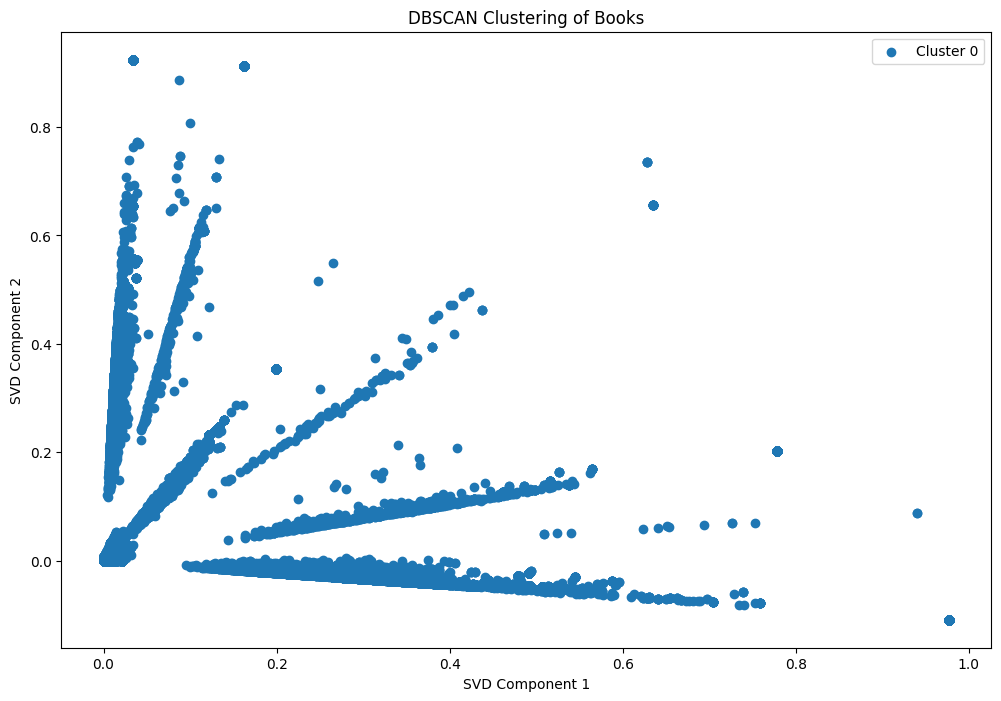

# Conclusion
- From the plot we see some books are isolated. This may mean:
  - The book may have unique content that sets it apart from others, leading to distinct patterns in its reviews
  - The reviews for the book might be highly diverse, making it difficult for the algorithm to place it within a specific cluster of similar reviews.
  - There may not be enough review data for the book, resulting in sparse feature representation and subsequent isolation in the clustering process.
- Some of the challenges that are like to affect the model performance are:
  - Semantic ambiguity, where words can have multiple meaninings
  - High dimensionality. This was a major computational challenge during for the algorithims and also for visualizations.

# Recommendation
Based on the DBSCAN clustering analysis of book reviews, here are some recommendations for further exploration:

  1. Examine the outlier books to understand what makes them unique. They could be books with unusual themes that might interest a specific audience.
  2. Combine the clustering results with other book metadata like genre and author to create a more comprehensive recommendation system.
  3. More time to have tune the algorithms to effectively and efficiently perform given the computational challenges

##### Contributors
- Jacqueline Chepkwony
- Mark Kuria
- Peter Muthoma
- Nicholas Njubi
- Johnmark Kibui